<a href="https://colab.research.google.com/github/sidra007/f.chollet_practice/blob/main/IMDB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 


**checking versionof tensorflow**

In [39]:
import tensorflow as tf
tf. __version__

'2.4.1'

**importing libraries**

In [40]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras import models,layers,optimizers
import numpy as np
import matplotlib.pyplot as plt

(train_data,train_labels),(test_data,test_labels)=imdb.load_data(num_words=10000)

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

**viewing data at index "0" whcih is tokenized (each word is converted into number)**

In [41]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [42]:
train_labels[0]

1

**preparing data**

defining a function manually for one hot encoding of words

In [45]:
def vectorize_sequences(sequences,dimension=10000):
  results=np.zeros((len(sequences),dimension))
  for i,sequence in enumerate(sequences):
    results[i,sequence]=1
  return results

one hot encoding/vectorizing train & test data

In [46]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)


In [48]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

one hot encoding/vectorizing train & test labels

In [50]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

**building network**

In [52]:
model = models.Sequential()
model.add(layers.Dense(16,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))


**optimizing**

In [56]:
model.compile (optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

spiliting train data into train and validation data

*   x is data
*   y is labels



In [58]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]


fitting the nwtwork

In [61]:
history = model.fit (partial_x_train,
                     partial_y_train,
                     epochs = 20,
                     batch_size = 512,
                     validation_data=(x_val,y_val))

Epoch 1/20
30/30 [==============================] - 4s 94ms/step - loss: 0.5967 - accuracy: 0.6882 - val_loss: 0.3901 - val_accuracy: 0.8682
Epoch 2/20
30/30 [==============================] - 1s 34ms/step - loss: 0.3245 - accuracy: 0.9011 - val_loss: 0.3064 - val_accuracy: 0.8862
Epoch 3/20
30/30 [==============================] - 1s 33ms/step - loss: 0.2299 - accuracy: 0.9284 - val_loss: 0.2801 - val_accuracy: 0.8907
Epoch 4/20
30/30 [==============================] - 1s 34ms/step - loss: 0.1806 - accuracy: 0.9458 - val_loss: 0.2809 - val_accuracy: 0.8862
Epoch 5/20
30/30 [==============================] - 1s 33ms/step - loss: 0.1444 - accuracy: 0.9571 - val_loss: 0.2786 - val_accuracy: 0.8877
Epoch 6/20
30/30 [==============================] - 1s 33ms/step - loss: 0.1163 - accuracy: 0.9672 - val_loss: 0.3048 - val_accuracy: 0.8797
Epoch 7/20
30/30 [==============================] - 1s 34ms/step - loss: 0.0966 - accuracy: 0.9739 - val_loss: 0.3035 - val_accuracy: 0.8838
Epoch 8/20
30

storing accuracy and losses in a variable named history_dict

In [62]:
history_dict = history.history
history_dict.keys()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

plotting epochs VS loss & val_loss

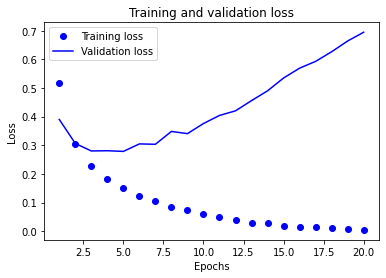

In [65]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()



***from this graph we have observed that val_loss starts increasing after 4 epochs***

plotting epochs VS acc & val_acc

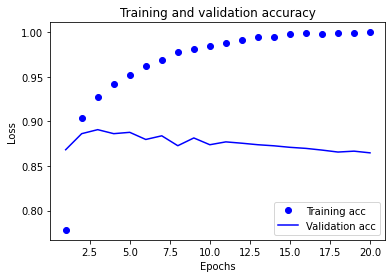

In [68]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


***so if we train our model only for 4 epochs, our model is good***

fitting again for 4 epochs

In [69]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)


Epoch 1/4
49/49 [==============================] - 2s 29ms/step - loss: 0.5915 - accuracy: 0.7353
Epoch 2/4
49/49 [==============================] - 1s 26ms/step - loss: 0.3106 - accuracy: 0.9057
Epoch 3/4
49/49 [==============================] - 1s 28ms/step - loss: 0.2179 - accuracy: 0.9264
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.2894 - accuracy: 0.8843


In [70]:
results

[0.2893916070461273, 0.8842800259590149]

making predictions from trained model now

In [75]:
model.predict(x_test)

array([[0.2235325 ],
       [0.9999511 ],
       [0.9460372 ],
       ...,
       [0.14575368],
       [0.10690576],
       [0.69213897]], dtype=float32)

***The network is very confident for some samples (0.99 or more, or 0.01 or less) but less confident for others (0.6, 0.4)***